In [193]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore", category=FutureWarning)

In [194]:
df=pd.read_csv('/content/drive/MyDrive/AI Free classes/Hackathon/free-ai-classes-in-every-city-hackathon/Train.csv')

In [195]:
df

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [196]:
df.describe

<bound method NDFrame.describe of      VehicleID Location          Maker                 Model   Year  Colour  \
0     VHL12546    Abuja          Honda   Accord Coupe EX V-6  2,011  Silver   
1     VHL18827   Ibadan        Hyundai                Sonata  2,012  Silver   
2     VHL19499    Lagos          Lexus                RX 350  2,010     Red   
3     VHL17991    Abuja  Mercedes-Benz             GLE-Class  2,017    Blue   
4     VHL12170   Ibadan         Toyota            Highlander  2,002     Red   
...        ...      ...            ...                   ...    ...     ...   
7200  VHL14329    Abuja          Honda                 Civic  2,018    Gray   
7201  VHL10637    Abuja            BMW                    X3  2,007   White   
7202  VHL19734    Abuja         Toyota  RAV4 2.5 Limited 4x4  2,010   Black   
7203  VHL15569    Lagos  Mercedes-Benz         GLK-Class 350  2,012   Black   
7204  VHL15246    Abuja          Honda      Accord Crosstour  2,012    Gray   

      Amount (Mil

In [197]:
df.describe()

,Amount (Million Naira)
count,7188.000000
mean,11.847999
std,25.318922
min,0.450000
25%,3.500000
50%,5.650000
75%,11.662500
max,456.000000


In [198]:
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [199]:
df.tail()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"
7204,VHL15246,Abuja,Honda,Accord Crosstour,"2,012",Gray,3.38,Nigerian Used,"83,308"


In [200]:
df.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [201]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [202]:
df.isnull().sum()/len(df)

VehicleID                 0.000000
Location                  0.000000
Maker                     0.000000
Model                     0.000000
Year                      0.002915
Colour                    0.000000
Amount (Million Naira)    0.002359
Type                      0.027342
Distance                  0.327550
dtype: float64

In [203]:
mode_value= df['Year'].mode()

In [204]:
mode_value

0    2,008
dtype: object

In [205]:
df['Year'].fillna(2_008, inplace=True)

In [206]:
df.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [207]:
average_value= df['Amount (Million Naira)'].mean()
average_value

11.847999443516972

In [208]:
df['Amount (Million Naira)'].fillna(average_value, inplace=True)

In [209]:
df.isnull().sum(
    
)

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)       0
Type                       197
Distance                  2360
dtype: int64

In [210]:
len(df)

7205

In [212]:
df.isnull().sum()/len(df)

VehicleID                 0.000000
Location                  0.000000
Maker                     0.000000
Model                     0.000000
Year                      0.000000
Colour                    0.000000
Amount (Million Naira)    0.000000
Type                      0.027342
Distance                  0.327550
dtype: float64

In [213]:
mode_value=df['Type'].mode()

In [214]:
mode_value

0    Foreign Used
dtype: object

In [215]:
df['Type'].fillna('Foreign Used', inplace=True)

In [216]:
df.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)       0
Type                         0
Distance                  2360
dtype: int64

In [217]:
df

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [219]:
average3_value=df['Distance'].mean()
average3_value

TypeError: ignored

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [221]:
df

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [222]:
df['Distance']=df['Distance'].str.replace(',','')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [224]:
df['Distance'] = df['Distance'].astype(float)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                4845 non-null   float64
dtypes: float64(2), object(7)
memory usage: 506.7+ KB


In [226]:
average2_value=df['Distance'].mean()
average2_value

103198.90361197111

In [227]:
df['Distance'].fillna(average2_value, inplace=True)
df.isnull().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [228]:
df

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,103198.903612
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,125000.000000
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,110852.000000
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,30000.000000
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,125206.000000
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,65000.000000
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,200000.000000
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,103198.903612
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,85750.000000


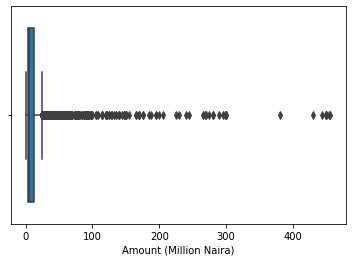

In [229]:
sns.boxplot(df['Amount (Million Naira)'])

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                7205 non-null   float64
dtypes: float64(2), object(7)
memory usage: 506.7+ KB


In [231]:
df.select_dtypes('object').nunique()

VehicleID    5141
Location        3
Maker          55
Model        1223
Year           34
Colour         21
Type            3
dtype: int64

In [232]:
df['Year']=df['Year'].str.replace(',','')

In [233]:
df['Year'] = df['Year'].astype(float)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   float64
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                7205 non-null   float64
dtypes: float64(3), object(6)
memory usage: 506.7+ KB


In [235]:
corr=df.select_dtypes('number').corr()
corr

,Year,Amount (Million Naira),Distance
Year,1.000000,0.452629,-0.299101
Amount (Million Naira),0.452629,1.000000,-0.134081
Distance,-0.299101,-0.134081,1.000000


In [236]:
df.select_dtypes('object').nunique()

VehicleID    5141
Location        3
Maker          55
Model        1223
Colour         21
Type            3
dtype: int64

In [237]:
df.drop(columns=['VehicleID','Maker','Model','Colour'], inplace=True)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                7205 non-null   object 
 1   Year                    7184 non-null   float64
 2   Amount (Million Naira)  7205 non-null   float64
 3   Type                    7205 non-null   object 
 4   Distance                7205 non-null   float64
dtypes: float64(3), object(2)
memory usage: 281.6+ KB


In [239]:
corr=df.select_dtypes('number').corr()
corr

,Year,Amount (Million Naira),Distance
Year,1.000000,0.452629,-0.299101
Amount (Million Naira),0.452629,1.000000,-0.134081
Distance,-0.299101,-0.134081,1.000000


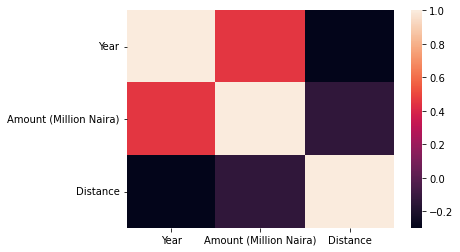

In [240]:
sns.heatmap(corr, cbar=True)

In [241]:
df.isnull().sum()

Location                   0
Year                      21
Amount (Million Naira)     0
Type                       0
Distance                   0
dtype: int64

In [242]:
mode4_value=df['Year'].mode()
mode4_value

0    2008.0
dtype: float64

In [243]:
median4_value=df['Year'].median()
median4_value

2011.0

In [244]:
df['Year'].fillna(median4_value, inplace=True)

In [245]:
df.isnull().sum()

Location                  0
Year                      0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [246]:
corr

,Year,Amount (Million Naira),Distance
Year,1.000000,0.452629,-0.299101
Amount (Million Naira),0.452629,1.000000,-0.134081
Distance,-0.299101,-0.134081,1.000000


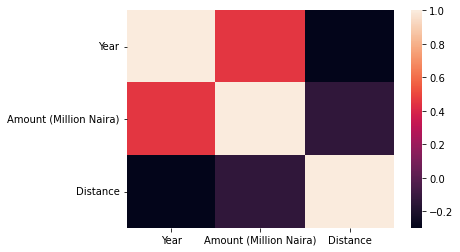

In [247]:
sns.heatmap(corr, cbar=True)

In [248]:
df["Year"].corr(df['Amount (Million Naira)'])

0.45259112213038405

In [249]:
df["Distance"].corr(df['Amount (Million Naira)'])

-0.13408118567435207

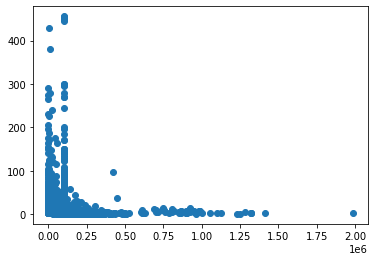

In [250]:
plt.scatter(x= df["Distance"], y =df["Amount (Million Naira)"])

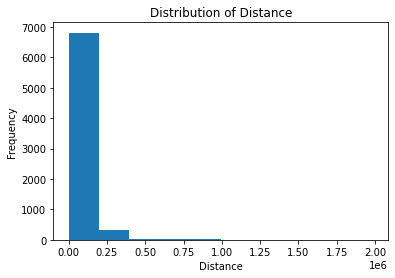

In [251]:
plt.hist(df["Distance"])
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Distance");

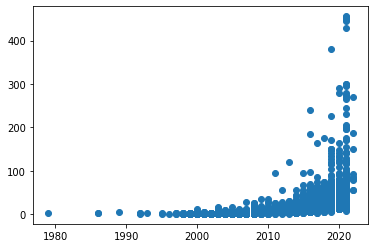

In [252]:
plt.scatter(x= df["Year"], y =df["Amount (Million Naira)"])

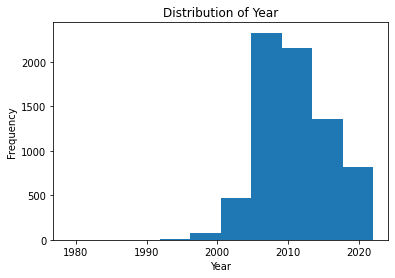

In [253]:
plt.hist(df["Year"])
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Year");

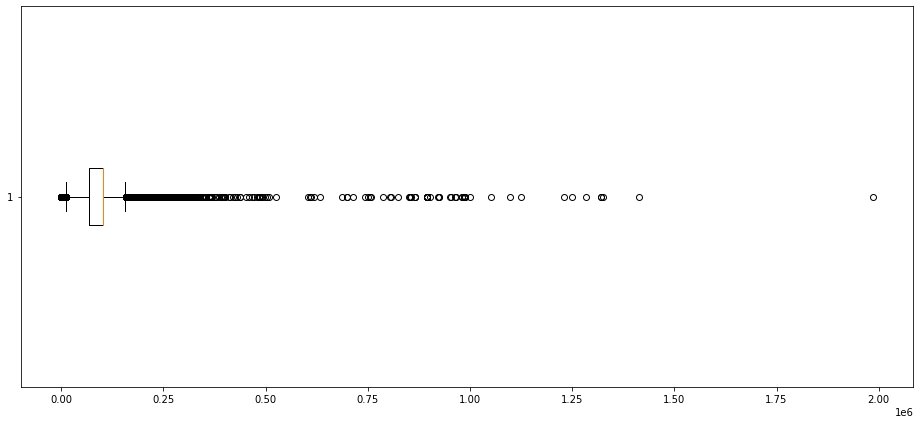

In [254]:
fig, ax = plt.subplots(figsize = (16,7))
plt.boxplot(df["Distance"], vert=False);

In [255]:
df.describe()

,Year,Amount (Million Naira),Distance
count,7205.000000,7205.000000,7.205000e+03
mean,2011.032616,11.847999,1.031989e+05
std,4.846181,25.289031,9.699830e+04
min,1979.000000,0.450000,1.000000e+00
25%,2008.000000,3.500000,6.700000e+04
50%,2011.000000,5.700000,1.031989e+05
75%,2014.000000,11.800000,1.031989e+05
max,2022.000000,456.000000,1.985400e+06


In [278]:
low, high = df["Distance"].quantile([0.1, 0.9])
mask_area = df["Distance"].between(low, high)
df[mask_area]

,Location,Year,Amount (Million Naira),Type,Distance
0,Abuja,2011.0,2.20,Nigerian Used,103198.903612
1,Ibadan,2012.0,3.50,Nigerian Used,125000.000000
2,Lagos,2010.0,9.20,Foreign Used,110852.000000
4,Ibadan,2002.0,2.60,Nigerian Used,125206.000000
5,Lagos,2011.0,7.50,Foreign Used,103198.903612
...,...,...,...,...,...
7199,Lagos,2007.0,5.80,Foreign Used,103198.903612
7200,Abuja,2018.0,5.70,Foreign Used,65000.000000
7202,Abuja,2010.0,2.85,Nigerian Used,103198.903612
7203,Lagos,2012.0,8.65,Foreign Used,85750.000000


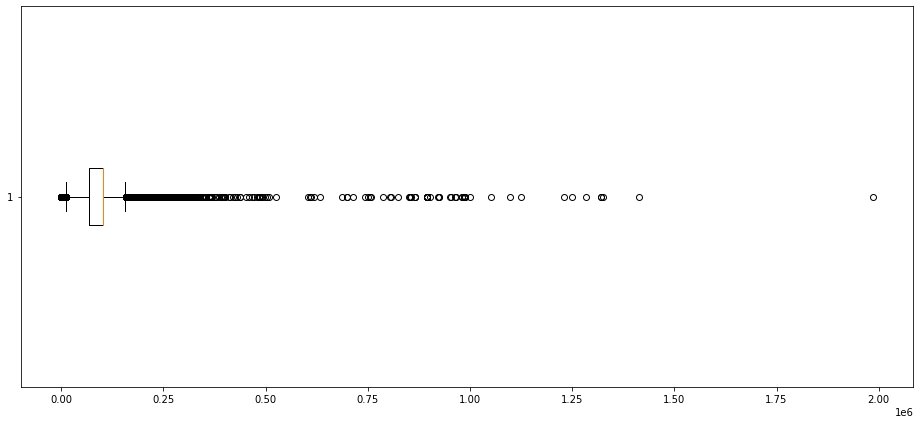

In [279]:
fig, ax = plt.subplots(figsize = (16,7))
plt.boxplot(df["Distance"], vert=False);

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                7205 non-null   object 
 1   Year                    7205 non-null   float64
 2   Amount (Million Naira)  7205 non-null   float64
 3   Type                    7205 non-null   object 
 4   Distance                7205 non-null   float64
dtypes: float64(3), object(2)
memory usage: 281.6+ KB


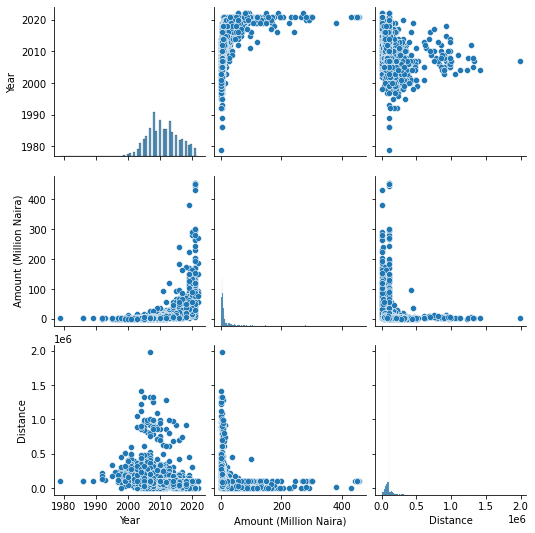

In [281]:
sns.pairplot(df)

In [282]:
#only taking the float types as features

In [294]:
target = "Amount (Million Naira)"
y = df[target]

features = ["Distance",'Year']
X =  df[features]

In [297]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_train))

ValueError: ignored

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#def rmse(predictions, targets):
 #   return np.sqrt(((predictions - targets) ** 2).mean())

In [300]:
def rmse(test, targets):
    return np.sqrt(((train - targets) ** 2).mean())

print("Mean Amount:",round(y_mean,2))

print("Baseline RMSE:", mean_squared_error(y_train, y_pred_baseline))

Mean Amount: 11.88
Baseline RMSE: 622.8076599662652


In [301]:
#y_mean = y_train.mean() 
#y_pred_baseline = [y_mean]*len(y_train)
#print("Mean apt price:",round(y_mean,2))

#print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

In [302]:
df.head()

,Location,Year,Amount (Million Naira),Type,Distance
0,Abuja,2011.0,2.2,Nigerian Used,103198.903612
1,Ibadan,2012.0,3.5,Nigerian Used,125000.000000
2,Lagos,2010.0,9.2,Foreign Used,110852.000000
3,Abuja,2017.0,22.8,Foreign Used,30000.000000
4,Ibadan,2002.0,2.6,Nigerian Used,125206.000000


In [303]:
df.tail()

,Location,Year,Amount (Million Naira),Type,Distance
7200,Abuja,2018.0,5.70,Foreign Used,65000.000000
7201,Abuja,2007.0,4.00,Nigerian Used,200000.000000
7202,Abuja,2010.0,2.85,Nigerian Used,103198.903612
7203,Lagos,2012.0,8.65,Foreign Used,85750.000000
7204,Abuja,2012.0,3.38,Nigerian Used,83308.000000


In [304]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
#df = df.replace(r'^\s*$', np.nan, regex=True)

In [305]:
df.isnull().sum()

Location                  0
Year                      0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [307]:
y_pred_training = model.predict(X_train)
print("Training RMSE:", mean_squared_error(y_train,y_pred_training))

Training RMSE: 491.5705367942374


In [308]:
y_pred_test = model.predict(X_test)
print("Training RMSE:", mean_squared_error(y_test,y_pred_test))

Training RMSE: 576.0458324792419


In [312]:
# print the y-axis intercept
intercept = model.intercept_
print(intercept)

-4765.822343780676


In [313]:
coeffients =  model.coef_

In [314]:
# Getting the coefficients of the data
coeff_df = pd.DataFrame(coeffients,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Distance,8.036824e-07
Year,2.375694e+00


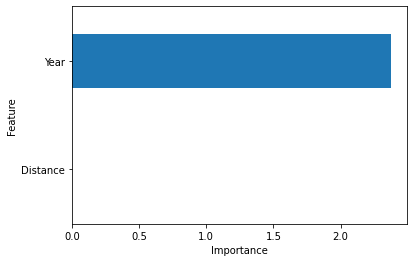

In [315]:
# showing this graphically....Plotting coefficients of the data
coeff_df["Coefficient"].sort_values(key=abs).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature");

In [316]:
print("Amount (Million Naira) = {}+{}*Distance + {}*Year"
      .format(intercept,coeff_df["Coefficient"]["Distance"],coeff_df["Coefficient"]["Year"],))

Amount (Million Naira) = -4765.822343780676+8.036823997122913e-07*Distance + 2.3756937823101523*Year


In [318]:
model.predict([[10,10]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


-4742.065397920751

In [319]:
df=pd.read_csv('/content/drive/MyDrive/AI Free classes/Hackathon/free-ai-classes-in-every-city-hackathon/Test.csv')

In [320]:
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [321]:
df.isnull().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           2
Colour         0
Type          54
Distance     676
dtype: int64

In [324]:
mode_value= df['Year'].mode()
mode_value

0    2,008
dtype: object

In [325]:
df['Year'].fillna(2_008, inplace=True)

In [326]:
df.shape

(2061, 8)

In [327]:
mode_value=df['Type'].mode()
mode_value

0    Foreign Used
dtype: object

In [328]:
df['Type'].fillna('Foreign Used', inplace=True)

In [330]:
df.isnull().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           0
Colour         0
Type           0
Distance     676
dtype: int64

In [331]:
average3_value=df['Distance'].mean()
average3_value

103800.66859205776

In [332]:
df['Distance'].fillna(average3_value, inplace=True)
df.isnull().sum()

VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Type         0
Distance     0
dtype: int64

In [356]:
df.drop(columns=["Amount (Million Naira"], inplace = True)

KeyError: ignored

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               2061 non-null   object 
 1   Location                2061 non-null   object 
 2   Maker                   2061 non-null   object 
 3   Model                   2061 non-null   object 
 4   Year                    2059 non-null   float64
 5   Colour                  2061 non-null   object 
 6   Type                    2061 non-null   object 
 7   Distance                2061 non-null   float64
 8   Amount (Million Naira)  2061 non-null   float64
dtypes: float64(3), object(6)
memory usage: 145.0+ KB


In [344]:
df['Year']=df['Year'].str.replace(',','')
df['Year'] = df['Year'].astype(float)

In [350]:
df['Amount (Million Naira)']=1

In [351]:
df

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount (Million Naira)
0,VHL18518,Abuja,BMW,323i,2008.0,White,Foreign Used,30524.000000,1
1,VHL17149,Lagos,Toyota,Camry,2013.0,White,Foreign Used,103800.668592,1
2,VHL10927,Lagos,Toyota,Highlander Limited V6,2005.0,Gold,Foreign Used,103800.668592,1
3,VHL12909,Lagos,Toyota,Camry,2011.0,Gray,Foreign Used,166839.000000,1
4,VHL12348,Lagos,Lexus,ES 350 FWD,2013.0,Red,Foreign Used,88862.000000,1
...,...,...,...,...,...,...,...,...,...
2056,VHL17903,Abuja,Toyota,Avalon,2020.0,Red,Foreign Used,2650.000000,1
2057,VHL14018,Ibadan,Audi,Q5,2011.0,Blue,Foreign Used,99000.000000,1
2058,VHL17473,Ibadan,Toyota,Camry,2015.0,Black,Foreign Used,108000.000000,1
2059,VHL11480,Abuja,Lexus,IS 350 AWD,2013.0,White,Foreign Used,52485.000000,1


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               2061 non-null   object 
 1   Location                2061 non-null   object 
 2   Maker                   2061 non-null   object 
 3   Model                   2061 non-null   object 
 4   Year                    2059 non-null   float64
 5   Colour                  2061 non-null   object 
 6   Type                    2061 non-null   object 
 7   Distance                2061 non-null   float64
 8   Amount (Million Naira)  2061 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 145.0+ KB


In [354]:
df['Amount (Million Naira)'] = df['Amount (Million Naira)'].astype(float)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2059 non-null   float64
 5   Colour     2061 non-null   object 
 6   Type       2061 non-null   object 
 7   Distance   2061 non-null   float64
dtypes: float64(2), object(6)
memory usage: 128.9+ KB


In [359]:
df.drop(columns=["Amount (Million Naira)"], inplace = True)

In [369]:
df['Amount (Million Naira)']=-4765.822343780676+0.00000083*['Distance'] + 2.3756937823101523*['Year']

TypeError: ignored

In [374]:
df.to_csv('/content/drive/MyDrive/AI Free classes/Hackathon/free-ai-classes-in-every-city-hackathon/hackathon.csv', index=False)